# <center> Face Mask Detection ~12K

###  About Dataset

#### Face Mask Detection Data set
In recent trend in world wide Lockdowns due to COVID19 outbreak, as Face Mask is became mandatory for everyone while roaming outside, approach of Deep Learning for Detecting Faces With and Without mask were a good trendy practice. Here I have created a model that detects face mask trained on almost 12000 images with 3 color channels (RGB).

#### Content

The dataset consists of almost 12K images which are almost 328.92MB in size.

Source : https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset?resource=download

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing required libraries
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Importing images and assigning them labels
image_size = 200
path1 = r"D:\Imarticus\Classroom\Deep Learning\Face Mask Dataset 12k"
cate = ['WithMask', 'WithoutMask']

input_image = []    
for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size  , image_size) )  # Resizing images to 200*200
        input_image.append([image_array , label])

In [4]:
# Total images
print('Total images:- ',len(input_image))

Total images:-  11792


Label of current image is :-  1


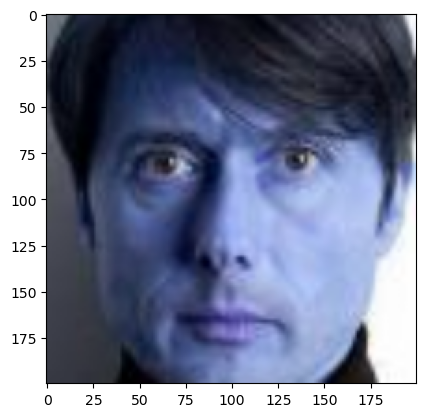

In [5]:
# label = zero for images with mask
# label = One for images with no-mask
print('Label of current image is :- ',input_image[11545][1])
plt.imshow(input_image[11545][0])
plt.show()

In [6]:
# Shuffling the data
np.random.shuffle(input_image)  

In [7]:
# Seperating data into Independant and Dependant attributes
X = []   
Y = []

for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

Label of current image is :-  0


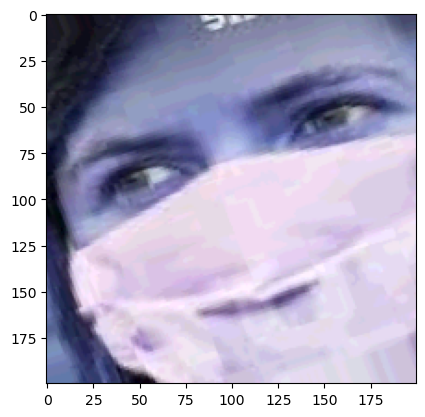

In [8]:
print('Label of current image is :- ',Y[800])
plt.imshow(X[800])
plt.show()

In [9]:
# In CNN input data is required to be in array format
# Converting atributes to an array
X = np.array(X)  
Y = np.array(Y)

In [10]:
# Splitting data into train and test using slicing method
# Here we are using 80-20 split
train_x = X[:9434]    
train_y = Y[:9434]

test_x = X[9434:11792]
test_y = Y[9434:11792]

In [11]:
# standerdizing the data
train_x = train_x / 255  
test_x = test_x / 255

In [12]:
# Converting labels to catagorical
new_train_y = to_categorical(train_y) 

In [13]:
# CNN model layers
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', padding='same', input_shape = (200,200,3)))   
model.add(MaxPool2D(pool_size=(2,2)))  # Using maxpooling

model.add(Flatten())      # Flatten layer

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [14]:
# optimizer
#adam = tf.keras.optimizers.Adam()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Training the model
model.fit(train_x, new_train_y, epochs=3, validation_split=0.2, batch_size=64)

Epoch 1/3
118/118 [==============================] - 146s 1s/step - loss: 0.8570 - accuracy: 0.9128 - val_loss: 0.0900 - val_accuracy: 0.9666
Epoch 2/3
118/118 [==============================] - 143s 1s/step - loss: 0.0702 - accuracy: 0.9754 - val_loss: 0.0440 - val_accuracy: 0.9841
Epoch 3/3
118/118 [==============================] - 140s 1s/step - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0509 - val_accuracy: 0.9820


In [28]:
# Predicting on test data
pred_test = model.predict(test_x)

74/74 [==============================] - 8s 108ms/step


In [29]:
pred_test

array([[1.2062202e-09, 1.0000000e+00],
       [9.9999106e-01, 8.9254017e-06],
       [1.0000000e+00, 1.0300197e-10],
       ...,
       [9.9999976e-01, 2.8201362e-07],
       [1.0000000e+00, 4.3195558e-10],
       [1.0000000e+00, 5.0237781e-10]], dtype=float32)

In [30]:
# finding the index of the maximum value 
pred_classes = pred_test.argmax(axis=1)

In [31]:
pred_classes

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
# Confusion matrix
tab = confusion_matrix(test_y, pred_classes)
tab

array([[1111,   36],
       [  12, 1199]], dtype=int64)

In [33]:
# accuracy
tab.diagonal().sum() * 100 / tab.sum()   

97.96437659033079

In [34]:
accuracy_score(test_y, pred_classes)

0.9796437659033079

In [35]:
"""
Results:

convolutional layer - 1 (maxpool)
filters = 32
kernel_size=(3,3)
pool_size=(2,2)
fully_connected_layer = 1
neurons = 128
epochs=5,
validation_split=0.2,
batch_size=64
accuracy = 98.64
[1175,   17],
[  15, 1151]
"""
"""
convolutional layer - 1 (avgpool)
filters = 64
kernel_size=(3,3)
pool_size=(2,2)
fully_connected_layer = 1
neurons = 256
epochs=3,
validation_split=0.2,
batch_size=64
accuracy = 98.17
[1134,   34],
[   9, 1181]
"""

'\nconvolutional layer - 1 (avgpool)\nfilters = 64\nkernel_size=(3,3)\npool_size=(2,2)\nfully_connected_layer = 1\nneurons = 256\nepochs=3,\nvalidation_split=0.2,\nbatch_size=64\naccuracy = 98.17\n[1134,   34],\n[   9, 1181]\n'

In [22]:
# Sving the model
#model.save("mask_no_mask_12k_98.h5")

In [36]:
pwd

'D:\\Imarticus\\Classroom\\Deep Learning'

- Here we have build face mask detection model using Convolutional Neural Network.
- we have tried different combinations of filters, kernel size, pooling method, pooling size and no.of neurons in hidden layer.
- The maximum accuracy achieved is 98%.
- Now we will combine this model with open CV to detect face mask on live camera.

In [43]:
# Getting saved model
from keras.models import load_model
import cv2
final_model = load_model('mask_no_mask_12k_98.h5')

- For detecting faces we will use pre trained model Haar cascades, and then classifies each detected face as either "Mask found" or "Mask not found" using the loaded model.

In [44]:
# Function for recognizing the face in input image using haar_cascade
face_cascade =  cv2.CascadeClassifier(r"D:\Imarticus\Classroom\Deep Learning\haar_cascade_xml_file\haarcascade_frontalface_alt2.xml")
model        =  load_model("mask_no_mask_12k_98.h5") 


def  face_extractor(img):
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.5 , minNeighbors = 5)
    if faces == ():
        return None
    
    
    for (x ,y , w, h)  in faces:
        cv2.rectangle(img , (x,y) , (x+w , y+h), (0,0, 255) , 2)
        roi =  img[y :y+h , x:x+w]
    
    return roi

In [46]:
# real-time face mask detection system using OpenCV
model = load_model("mask_no_mask_pga39.h5")  # Load the pre-trained model

results = {0: 'Mask found', 1: 'Mask not found'}
GR_dict = {0: (0, 255, 255), 1: (0, 255, 0)}

rect_size = 4
cap = cv2.VideoCapture(0)

haarcascade = cv2.CascadeClassifier(r"D:\Imarticus\Classroom\Deep Learning\haar_cascade_xml_file\haarcascade_frontalface_alt2.xml")

while True:
    rval, im = cap.read()
    im = cv2.flip(im, 1, 1)

    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    
    for f in faces:
        x, y, w, h = [v * rect_size for v in f]

        face_img = im[y:y+h, x:x+w]
        rerect_sized = cv2.resize(face_img, (200, 200))
        normalized = rerect_sized / 255.0
        reshaped = np.reshape(normalized, (1, 200, 200, 3))
        reshaped = np.vstack([reshaped])
        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]

        cv2.rectangle(im, (x, y), (x+w, y+h), GR_dict[label], 2)
        cv2.rectangle(im, (x, y-40), (x+w, y), GR_dict[label], -1)
        cv2.putText(im, results[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    cv2.imshow('Liv Camera', im)
    key = cv2.waitKey(1) & 0xFF  # Mask the key with 0xFF to get only the last 8 bits

    if key == 27:  # Check if the key is the "Esc" key
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 14ms/step


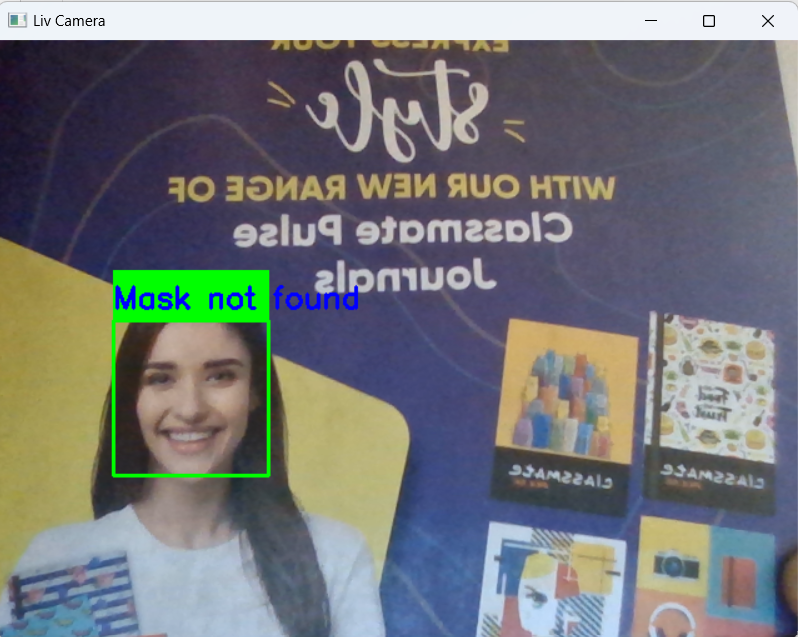

In [51]:
# Example
from IPython.display import Image
image_path = 'Face_detection_example.png'
Image(filename=image_path)